# Question 1

In [2]:
from astropy.io import fits

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats

lc1 = fits.open('ch2_xsm_20210923_v1_level2.lc')
lc2 = fits.open('ch2_xsm_20210924_v1_level2.lc')
lc3 = fits.open('ch2_xsm_20210927_v1_level2.lc')
lc4 = fits.open('ch2_xsm_20210928_v1_level2.lc')
lc5 = fits.open('ch2_xsm_20210929_v1_level2.lc')
lc_arr = [lc1, lc2, lc3, lc4, lc5]

In [3]:
# Display HDUList of each fits file
lc1.info()

Filename: ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   


In [4]:
# Open both HDULists and check headers
lc1_primary = lc1[0].header
lc1_rate = lc1[1].header

In [5]:
lc1_primary

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenlc '          / Creator of file                                
FILENAME= 'ch2_xsm_20210923_v1_level2.lc' / Name of file                        
CONTENT = 'Light curve'     

In [6]:
lc1_rate

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                84280 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

We notice that the RATE header contains data for counts and hence this must be the one which will be more useful going forward

# Question 2: Lightcurves


#### a) In 1b, you identified the header in the file that contains count rate information. Load up this data. What data type is it stored as and what all information does it contain?

In [7]:
# Load data from RATE HDU
lc1_data = lc1[1].data

In [8]:
print("Data: ")
print(lc1_data)
print("Size and data type:")
print(lc1_data.shape, lc1_data.dtype)

Data: 
[(1.49126401e+08, 494.83276, 22.244837, 1.)
 (1.49126402e+08, 518.2688 , 22.765518, 1.)
 (1.49126403e+08, 504.4697 , 22.460403, 1.) ...
 (1.49212797e+08, 376.00684, 19.390896, 1.)
 (1.49212798e+08, 374.12167, 19.342226, 1.)
 (1.49212799e+08, 401.34076, 20.033491, 1.)]
Size and data type:
(84280,) (numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')])


The data stored is in the form of 4-tuples with floats as entries. This data has time stamps, the count rate, and what seems like two columns for error estimation. Actually very cool.

#### b) Plot a lightcurve for each of the lc files. (You can use a for loop and plot them all at the same time). A lightcurve is simply a plot of the countrate on the y-axis and the timestamps on the x-axis. Appropriately label the axes, provide a title to the plot etc. (Basically labelling the plot properly)

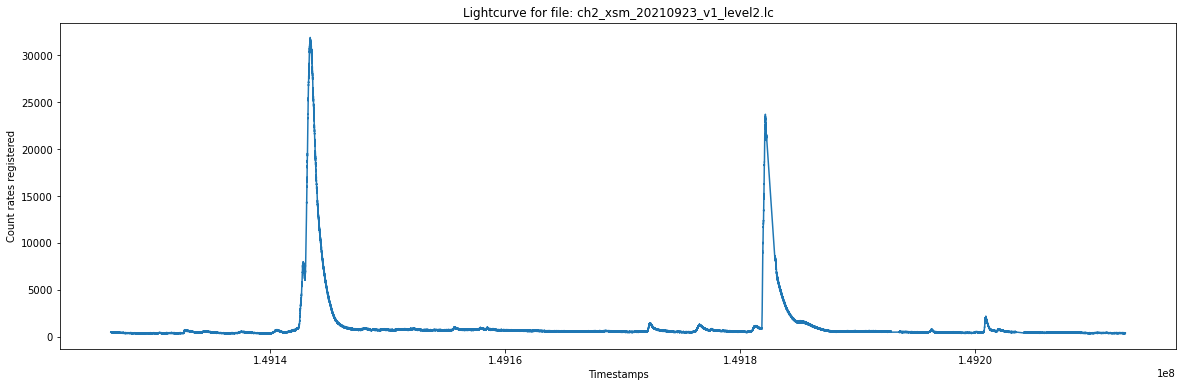

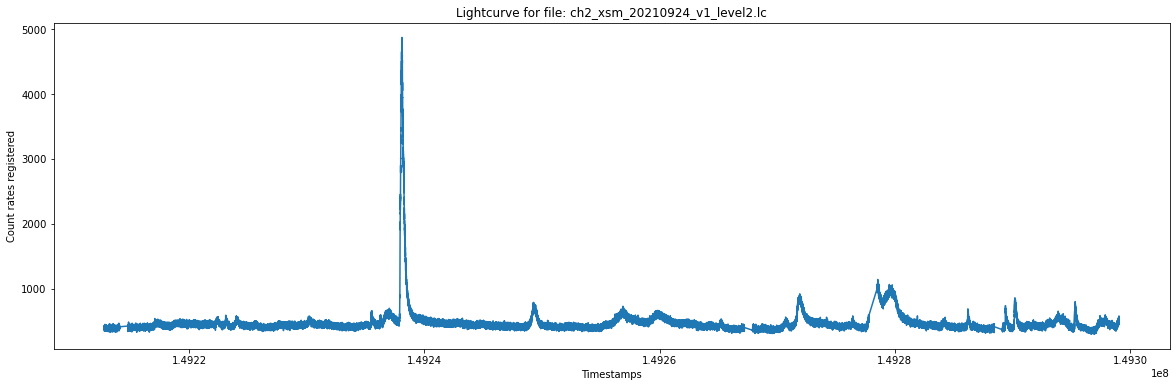

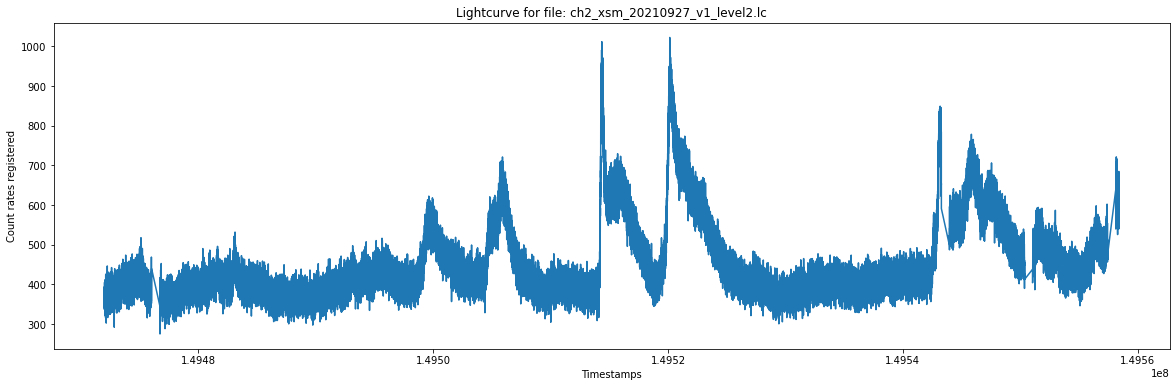

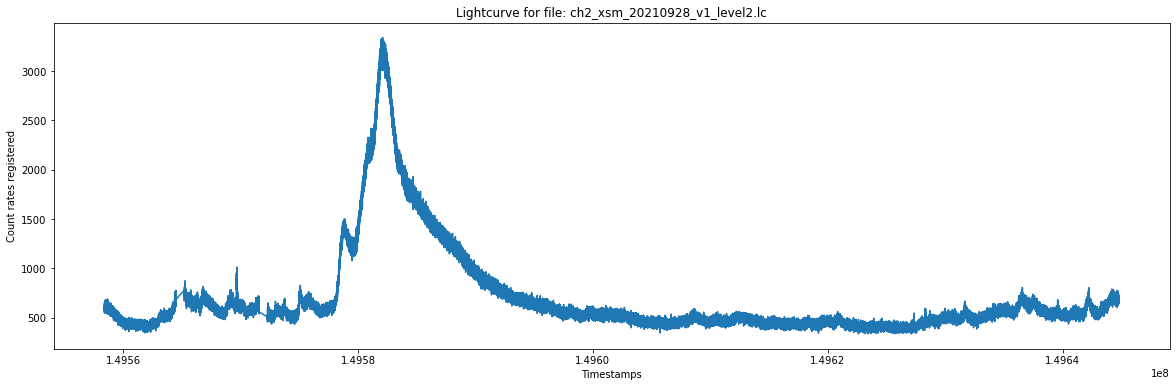

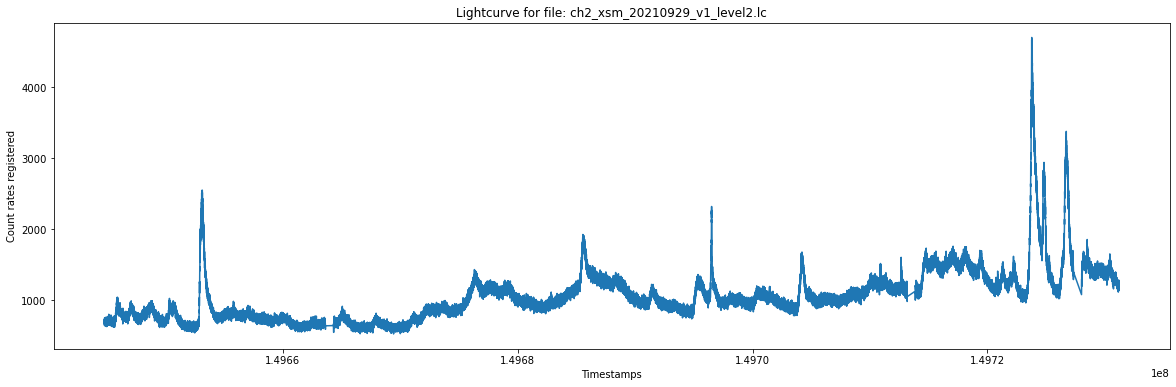

In [9]:
# Run a loop through all lc files
for lc in lc_arr:
    fig, ax = plt.subplots(1, 1, figsize = (20, 6))
    ax.plot(lc[1].data['TIME'], lc[1].data['RATE'])
    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Count rates registered")
    ax.set_title(f"Lightcurve for file: {lc[0].header['FILENAME']}")

#### c) Is there anything peculiar about the time axis? What do you think it is?

The time axis does not start from zero. Its range is from about $1.4964$ to $1.4976$ ($10^8$) seconds. Quite a weird range to have. The difference is about $86400$ seconds which corresponds to a whole day of measurements.

# Question 3

#### a) Identify flares from the above lightcurve visually. The identification involves marking a start time and a stop time of the flare. You can come up with your own method to set them, with justification.

Flares are sudden peaks in count rates. So in the graphs they would appear as sharp impules in a relatively calm background. The start and stop times can be estimated by noticing at what point there is a dramatic increase in slope. The following times are choosen:

Curve 1 (ch2_xsm_20210923_v1_level2.lc):
- Flare 1: Start = $1.491425$, Stop = $1.49146$ (Both in $10^8$ seconds)
- Flare 2: Start = $1.491815$, Stop = $1.49185$ (Both in $10^8$ seconds)

And so on for the others...

#### b) Mark the start and stop time of flares in your lightcurves using vertical lines.

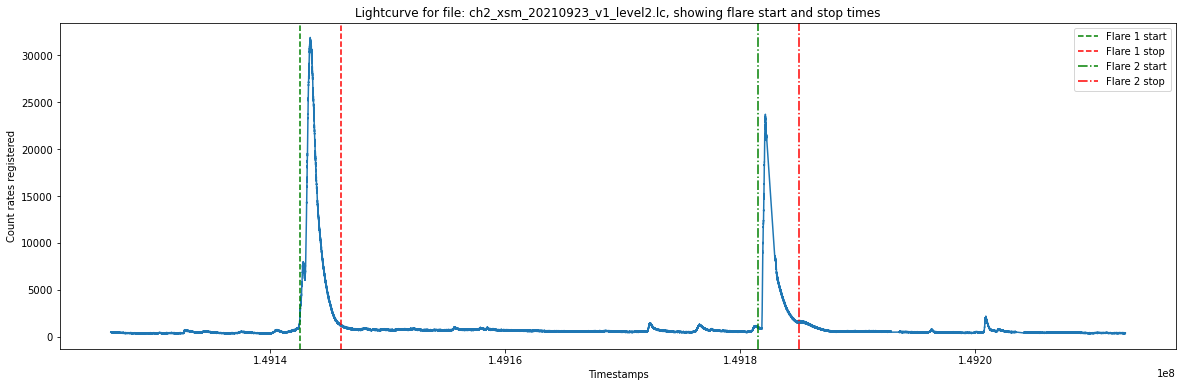

In [10]:
lc = lc1
fig, ax = plt.subplots(1, 1, figsize = (20, 6))
ax.plot(lc[1].data['TIME'], lc[1].data['RATE'])
ax.set_xlabel("Timestamps")
ax.set_ylabel("Count rates registered")
ax.set_title(f"Lightcurve for file: {lc[0].header['FILENAME']}, showing flare start and stop times")
ax.axvline(x = 1.491425e8, color = "green", label = "Flare 1 start", linestyle = "dashed")
ax.axvline(x = 1.49146e8, color = "red", label = "Flare 1 stop", linestyle = "dashed")
ax.axvline(x = 1.491815e8, color = "green", label = "Flare 2 start", linestyle = "dashdot")
ax.axvline(x = 1.49185e8, color = "red", label = "Flare 2 stop", linestyle = "dashdot")
ax.legend()

#### c) Calculate the following (Not necessary for all the flares you find, 2-4 should be sufficient):

- The mean count rate in the flare window

In [11]:
# Get indices for first Flare
flare1_start = 1.491425e8
flare1_stop = 1.49146e8
flare1_time = lc1[1].data['TIME']
#flare1_time = flare1_time.astype(np.int64)
flare1_window = np.intersect1d(np.where(flare1_time < flare1_stop)[0],np.where(flare1_time > flare1_start)[0])
flare1_rates = lc1[1].data['RATE'][flare1_window]
print(f"Mean count rate for first flare = {np.mean(flare1_rates)}")

# Get indices for second flare
flare2_start = 1.491815e8
flare2_stop = 1.49185e8
flare2_time = lc1[1].data['TIME']
#flare1_time = flare1_time.astype(np.int64)
flare2_window = np.intersect1d(np.where(flare2_time < flare2_stop)[0],np.where(flare2_time > flare2_start)[0])
flare2_rates = lc1[1].data['RATE'][flare2_window]
print(f"Mean count rate for second flare = {np.mean(flare2_rates)}")

Mean count rate for first flare = 10336.5732421875
Mean count rate for second flare = 4968.5791015625


- The peak count rate in the flare window

In [16]:
# Get max value for each flare rate array
max1 = np.max(flare1_rates)
max2 = np.max(flare2_rates)
print(f"Peak count rate for first flare = {max1}")
print(f"Peak count rate for second flare = {max2}")

Peak count rate for first flare = 31883.888671875
Peak count rate for second flare = 23705.484375


- Average slope of rise

In [25]:
peak_time1 = flare1_time[flare1_window[np.argmax(flare1_rates)]]
peak_time2 = flare1_time[flare2_window[np.argmax(flare2_rates)]]
print(f"Average slope of rise for first flare = {(max1 - flare1_rates[0])/(peak_time1 - flare1_start)} count-rate/s")
print(f"Average slope of rise for second flare = {(max2 - flare2_rates[0])/(peak_time2 - flare2_start)} count-rate/s")

Average slope of rise for first flare = 33.69883152353932 count-rate/s
Average slope of rise for second flare = 35.190148182311276 count-rate/s


- Average slope of fall

In [26]:
print(f"Average slope of fall for first flare = {(max1 - flare1_rates[-1])/(flare1_stop - peak_time1)} count-rate/s")
print(f"Average slope of fall for second flare = {(max2 - flare2_rates[-1])/(flare2_stop - peak_time2)} count-rate/s")

Average slope of fall for first flare = 11.688928284903021 count-rate/s
Average slope of fall for second flare = 7.765701922065484 count-rate/s


#### d) Calculate the mean background rate as well. For this exclude all flares in a lightcurve and calculate the mean of the remaining data points. How is this value in comparison to the flare mean count on average?

In [13]:
time = lc1[1].data['TIME']
bg_time_indices = []
for i in range(len(time)):
    if (time[i] in flare1_window or time[i] in flare2_window):
        continue
    else:
        bg_time_indices.append(i)

bg_rates = lc[1].data['RATE'][bg_time_indices]
print(f"Mean background rate = {np.mean(bg_rates)}")

Mean background rate = 1151.8309326171875


Much less than flare count rates. About one-fourth the rate of the second flare and one-ninth that of the first flare.